# Non-standard amino acids in KLIFS molecules

Aims of this notebook:
1. For all KLIFS molecules, save all non-standard amino acids.
2. Check amount of non-standard amino acids. Some `kinsim_structure` features are only defined for standard amino acids, thus we need to check how much information we loose in our dataset.

## Imports and functions

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import itertools
from pathlib import Path
import pickle
import sys

import pandas as pd
import pypdb
from rdkit.Chem import PandasTools

sys.path.append('../..')
from kinsim_structure.analysis import NonStandardKlifsAminoAcids
from kinsim_structure.auxiliary import split_klifs_code, get_klifs_regions

## Globals

In [4]:
KLIFS_REGIONS = get_klifs_regions()

In [5]:
KLIFS_REGIONS.head()

,region_name,klifs_id
klifs_id,,
1,I,1
2,I,2
3,I,3
4,g.I,4
5,g.I,5


## IO paths

In [6]:
path_to_kinsim = Path('.') / '..' / '..'
path_to_data = Path('/') / 'home' / 'dominique' / 'Documents' / 'data' / 'kinsim' / '20190724_full'

path_to_results = path_to_kinsim / 'results' 

metadata_path = path_to_data / 'postprocessed' / 'klifs_metadata_postprocessed.csv' 

In [7]:
output_path =  path_to_kinsim / 'examples' / 'results' / 'features' / 'non_standard_aminoacids.p'   

## Load KLIFS metadata

In [8]:
klifs_metadata = pd.read_csv(metadata_path, index_col=0)

In [9]:
klifs_metadata.shape

(3878, 23)

In [10]:
klifs_metadata

,metadata_index,kinase,family,groups,pdb_id,chain,alternate_model,species,ligand_orthosteric_name,ligand_orthosteric_pdb_id,...,ac_helix,rmsd1,rmsd2,qualityscore,pocket,resolution,missing_residues,missing_atoms,full_ifp,code
0,2886,AAK1,NAK,Other,4wsq,B,A,Human,K-252A,KSA,...,in,0.777,2.125,8.6,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.95,0,14,0000000000000010000001000000000000000000000000...,HUMAN/AAK1/4wsq_chainB_altA
1,10043,AAK1,NAK,Other,5l4q,A,A,Human,"~{N}-[5-(4-cyanophenyl)-1~{H}-pyrrolo[2,3-b]py...",LKB,...,in,0.780,2.137,9.7,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.97,0,3,0000000000000010000000000000000000000000000000...,HUMAN/AAK1/5l4q_chainA_altA
2,7046,AAK1,NAK,Other,5te0,A,-,Human,methyl (3Z)-3-{[(4-{methyl[(4-methylpiperazin-...,XIN,...,in,0.776,2.120,8.8,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.90,0,12,1000101000000010000001000000000000000000000000...,HUMAN/AAK1/5te0_chainA
3,843,ABL1,Abl,TK,2f4j,A,-,Human,CYCLOPROPANECARBOXYLIC ACID {4-[4-(4-METHYL-PI...,VX6,...,in,0.779,2.128,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.91,0,0,0000000000000010000001000000000000000000000000...,HUMAN/ABL1/2f4j_chainA
4,815,ABL1,Abl,TK,2g1t,A,-,Human,-,-,...,out,0.825,2.154,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.80,0,0,NaN,HUMAN/ABL1/2g1t_chainA
5,859,ABL1,Abl,TK,2g2i,A,-,Human,ADENOSINE-5'-DIPHOSPHATE,ADP,...,in,0.789,1.993,6.8,HKLGGG___EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,3.12,3,0,0000000000000010000001000000000000000000000000...,HUMAN/ABL1/2g2i_chainA
6,816,ABL1,Abl,TK,2gqg,A,B,Human,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,1N1,...,in,0.781,2.127,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.40,0,0,0000000000000010000000000000000000000000000000...,HUMAN/ABL1/2gqg_chainA_altB
7,807,ABL1,Abl,TK,2hz4,B,-,Human,"1,2,3,4-TETRAHYDROGEN-STAUROSPORINE",4ST,...,in,0.780,1.968,6.0,HKLG_____EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,2.80,5,0,0000000000000010000000000000000000000000000000...,HUMAN/ABL1/2hz4_chainB
8,832,ABL1,Abl,TK,2v7a,B,-,Human,N-[(3E)-5-[(2R)-2-METHOXY-2-PHENYLACETYL]PYRRO...,627,...,in,0.787,2.095,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIIIE...,2.50,0,0,0000000000000010000000000000100000010000000000...,HUMAN/ABL1/2v7a_chainB
9,829,ABL1,Abl,TK,4twp,B,-,Human,AXITINIB,AXI,...,in,0.781,2.138,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIIIE...,2.40,0,0,0000000000000010000001000000000000000000000000...,HUMAN/ABL1/4twp_chainB


## Data generation

## Data analysis

In [11]:
with open(output_path, 'rb') as f:
    non_standard_aminoacids = pickle.load(f)

### Get non-standard amino acid names

In [12]:
print(
    f'Number of non-standard amino acids in KLIFS dataset: ' 
    f'{len(non_standard_aminoacids.data)}'
)

Number of non-standard amino acids in KLIFS dataset: 18


In [13]:
print(
    f'Number of structures with non-standard amino acids:',
    f'{len(non_standard_aminoacids.data.groupby(by=["code"]).groups)}'
)

Number of structures with non-standard amino acids: 14


In [14]:
# Get set of non-standard amino acids
pdb_ids = set(non_standard_aminoacids.data.res_name)
pdb_ids

{'CAF', 'CME', 'CSS', 'KCX', 'MSE', 'OCY', 'PTR'}

These non-standard residues derive from:
* __CAF, CME, CSS, OCY__: L-peptide linking (parent CYS)
* __KCX__: L-peptide linking (parent LYS)
* __MSE__: L-peptide linking (parent MET) - SELENOMETHIONINE
* (__PHD__: L-peptide linking (parent ASP) - ASPARTYL PHOSPHATE - already excluded in preprocessing)
* __PTR__: L-peptide linking (parent TYR) - O-PHOSPHOTYROSINE

### Get information on these amino acids from PDB

In [15]:
pdb_metadata = []

for pdb_id in pdb_ids:
    pdb_metadata.append(pypdb.describe_chemical(pdb_id))
    
pdb_metadata = pd.DataFrame([i['describeHet']['ligandInfo']['ligand'] for i in pdb_metadata])
pdb_metadata

,@chemicalID,@type,@molecularWeight,chemicalName,formula,InChI,InChIKey,smiles
0,CME,L-peptide linking,197.276,"S,S-(2-HYDROXYETHYL)THIOCYSTEINE",C5 H11 N O3 S2,InChI=1S/C5H11NO3S2/c6-4(5(8)9)3-11-10-2-1-7/h...,YPUBRSXDQSFQBA-BYPYZUCNSA-N,C(CSSC[C@@H](C(=O)O)N)O
1,CSS,L-peptide linking,153.223,S-MERCAPTOCYSTEINE,C3 H7 N O2 S2,"InChI=1S/C3H7NO2S2/c4-2(1-8-7)3(5)6/h2,7H,1,4H...",XBKONSCREBSMCS-REOHCLBHSA-N,C([C@@H](C(=O)O)N)SS
2,MSE,L-peptide linking,196.106,SELENOMETHIONINE,C5 H11 N O2 Se,"InChI=1S/C5H11NO2Se/c1-9-3-2-4(6)5(7)8/h4H,2-3...",RJFAYQIBOAGBLC-BYPYZUCNSA-N,C[Se]CC[C@@H](C(=O)O)N
3,PTR,L-peptide linking,261.168,O-PHOSPHOTYROSINE,C9 H12 N O6 P,InChI=1S/C9H12NO6P/c10-8(9(11)12)5-6-1-3-7(4-2...,DCWXELXMIBXGTH-QMMMGPOBSA-N,c1cc(ccc1C[C@@H](C(=O)O)N)OP(=O)(O)O
4,KCX,L-peptide linking,190.197,LYSINE NZ-CARBOXYLIC ACID,C7 H14 N2 O4,InChI=1S/C7H14N2O4/c8-5(6(10)11)3-1-2-4-9-7(12...,PWIKLEYMFKCERQ-YFKPBYRVSA-N,C(CCNC(=O)O)C[C@@H](C(=O)O)N
5,OCY,L-peptide linking,165.211,HYDROXYETHYLCYSTEINE,C5 H11 N O3 S,"InChI=1S/C5H11NO3S/c6-4(5(8)9)3-10-2-1-7/h4,7H...",MWFRVMDVLYIXJF-BYPYZUCNSA-N,C(CSC[C@@H](C(=O)O)N)O
6,CAF,L-peptide linking,241.14,S-DIMETHYLARSINOYL-CYSTEINE,C5 H12 As N O3 S,"InChI=1S/C5H12AsNO3S/c1-6(2,10)11-3-4(7)5(8)9/...",HBKZDQYWGRUTJX-BYPYZUCNSA-N,C[As](=O)(C)SC[C@@H](C(=O)O)N


In [16]:
PandasTools.AddMoleculeColumnToFrame(pdb_metadata, smilesCol='smiles')

,@chemicalID,@type,@molecularWeight,chemicalName,ROMol
0,CME,L-peptide linking,197.276,"S,S-(2-HYDROXYETHYL)THIOCYSTEINE",
1,CSS,L-peptide linking,153.223,S-MERCAPTOCYSTEINE,
2,MSE,L-peptide linking,196.106,SELENOMETHIONINE,
3,PTR,L-peptide linking,261.168,O-PHOSPHOTYROSINE,
4,KCX,L-peptide linking,190.197,LYSINE NZ-CARBOXYLIC ACID,
5,OCY,L-peptide linking,165.211,HYDROXYETHYLCYSTEINE,
6,CAF,L-peptide linking,241.14,S-DIMETHYLARSINOYL-CYSTEINE,

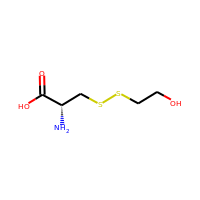
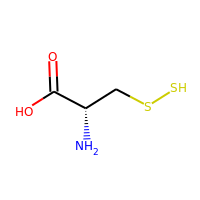
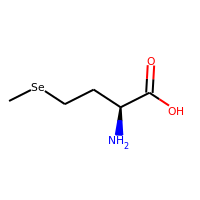
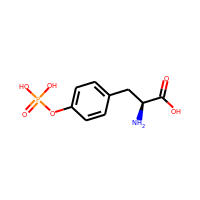
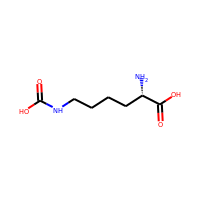
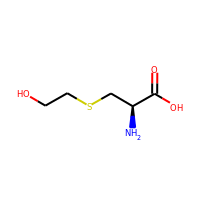
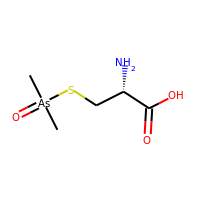

In [17]:
pdb_metadata.drop(['smiles', 'formula', 'InChIKey', 'InChI'], axis=1)

### Get KLIFS regions where these amino acids live

In [18]:
# Add KLIFS region name and sort by KLiFS residue name
non_std = non_standard_aminoacids.data.copy()

non_std['region_name'] = non_std.apply(
    lambda x: KLIFS_REGIONS.loc[x.klifs_id], 
    axis=1
)['region_name']

non_std.sort_values(by='klifs_res_name')

,res_name,res_id,klifs_id,code,klifs_res_name,region_name
0,MSE,357,16,HUMAN/ADCK3_5i35_chainA,M,III
11,MSE,138,45,HUMAN/MAPKAPK2_1nxk_chainA,M,GK
10,MSE,94,18,HUMAN/MAPKAPK2_1nxk_chainA,M,III
7,MSE,237,28,HUMAN/IRAK4_2o8y_chainB,M,aC
6,MSE,192,3,HUMAN/IRAK4_2o8y_chainB,M,I
8,MSE,265,48,HUMAN/IRAK4_2o8y_chainB,M,hinge
1,MSE,485,67,HUMAN/ADCK3_5i35_chainA,M,VI
3,KCX,33,17,HUMAN/CDK2_1oir_chainA,X,III
9,OCY,154,54,HUMAN/JNK3_2r9s_chainB,X,aD
2,CAF,247,61,HUMAN/AurA_4j8m_chainA,X,aE


### Decisions for preprocessing and encoding

* MSE (selenomethionine): 
  * KLIFS treats it as M (methionine) and we will do the same. 
  * Selenomethionine is often used in X-ray for crystallization (introduce heavy atom to help solve the phase problem)
* Residues denoted in KLIFS with an X (mutants, modified residues): 
  * Remove structure if they fall into important regions of the binding site: PHD (aspartyl phosphate) at DFG loop
  * Remaining structures/residues stay in dataset: 
      * None pharmacophore/size (no - include as parent residue?)
      * Value exposure/distances (ok)
      * Value side chain angle (no - use mean value for parent residue?)
* Phosphorylated residues, i.e. PTR (O-phosphotyrosine):
    * KLIFS treats it as Y (tyrosine) and we will do the same (otherwise we will not match unphosphorylated similar binding sites)
    
   
### Rules for modified residues

* Pharmacophore/size: Include as parent residue
* Exposure/distances: Normal calculation
* Side chain angle: Normal calculation